# AllAnalytics - The analytics for the Allmity app

### Importing the required libraries

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster


## Displaying user retention stats

In [16]:
user_retention_df = pd.read_excel("user_retention.xlsx")
user_retention_df.head()


,Date,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5
0,Feb 13 - Feb 19,56,20,18,6,12,6
1,Feb 20 - Feb 26,42,8,5,3,6,-1
2,Feb 27 - Mar 05,69,14,9,7,-1,-1
3,Mar 06 - Mar 12,60,15,10,-1,-1,-1
4,Mar 13 - Mar 19,41,12,-1,-1,-1,-1


In [17]:
user_retention_df = user_retention_df.replace(-1, np.nan)
user_retention_df.head()

,Date,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5
0,Feb 13 - Feb 19,56,20.0,18.0,6.0,12.0,6.0
1,Feb 20 - Feb 26,42,8.0,5.0,3.0,6.0,NaN
2,Feb 27 - Mar 05,69,14.0,9.0,7.0,NaN,NaN
3,Mar 06 - Mar 12,60,15.0,10.0,NaN,NaN,NaN
4,Mar 13 - Mar 19,41,12.0,NaN,NaN,NaN,NaN


In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

retention_matrix = user_retention_df.pivot_table(index="Date")

retention_matrix


,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5
Date,,,,,,
Feb 13 - Feb 19,56,20.0,18.0,6.0,12.0,6.0
Feb 20 - Feb 26,42,8.0,5.0,3.0,6.0,NaN
Feb 27 - Mar 05,69,14.0,9.0,7.0,NaN,NaN
Mar 06 - Mar 12,60,15.0,10.0,NaN,NaN,NaN
Mar 13 - Mar 19,41,12.0,NaN,NaN,NaN,NaN
Mar 20 - Mar 26,37,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

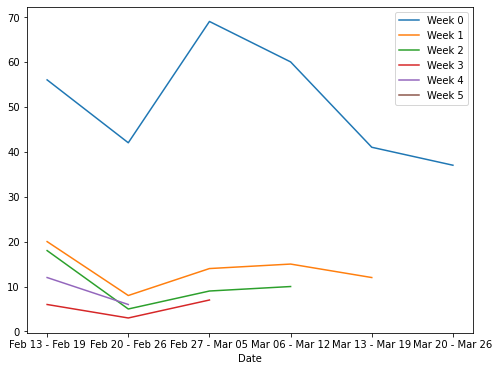

In [19]:
user_retention_df.plot(kind='line', x='Date', y=[
                       'Week 0', 'Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'], figsize=(8, 6))


<AxesSubplot:title={'center':'Monthly Cohorts: User Retention'}, ylabel='Date'>

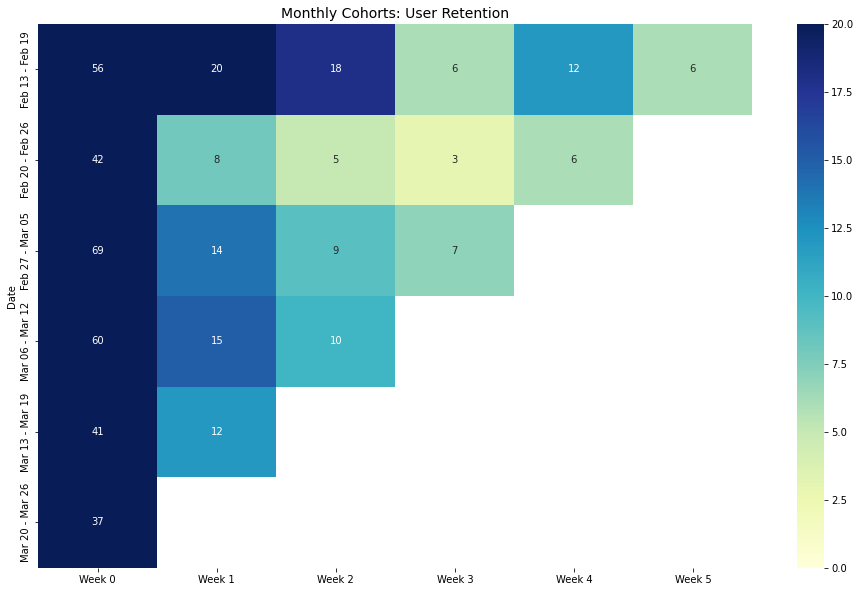

In [20]:
# with sns.axes_style("white"):
#     fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
#                            'width_ratios': [1, 11]})

#     # retention matrix
#     sns.heatmap(retention_matrix,
#                 mask=retention_matrix.isnull(),
#                 annot=True,
#                 fmt='.0%',
#                 cmap='RdYlGn', # YlGnBu
#                 ax=ax[1])
#     ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
#     # ax[1].set(xlabel='# of periods',
#     #           ylabel=''
#     #           )

#     fig.tight_layout()

plt.figure(figsize=(16, 10))

# Adding a title
plt.title("Monthly Cohorts: User Retention", fontsize = 14)

# Creating the heatmap
sns.heatmap(retention_matrix, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')


## Number of users in each country on a world map

In [21]:
# # Function to get longitude and latitude data from country name
# geolocator = Nominatim(user_agent="http")
# lat = list()
# long = list()


# def geolocate(country):
#     try:
#         # Geolocate the center of the country
#         loc = geolocator.geocode(country)
#         # Append latitude and longitude
#         lat.append(loc.latitude)
#         long.append(loc.longitude)
#         return 1
#     except:
#         return np.nan


# df4 = pd.read_excel('country_users.xlsx')

# # To remove countries with 0 users
# # df4 = df4[df4['Users'] != 0]

# df4.head()


In [22]:
# for i in df4['Country']:
#     geolocate(i)
# df4['Latitude'] = lat
# df4['Longitude'] = long

# df4.head()


In [24]:
#TO DISPLAY WORLD MAP OF USERS

import numpy as np
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
lat = list()
long = list()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        lat.append(loc.latitude)
        long.append(loc.longitude)
        #return (loc.latitude, loc.longitude)
        return 1
    except:
        # Return missing value
        return np.nan

df4 = pd.read_excel('country_users.xlsx')
df4.head()

for i in df4['Country']:
    geolocate(i)
df4['Latitude'] = lat
df4['Longitude'] = long
    
df4.head()

import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df4)):
        lat = df4.iloc[i]['Latitude']
        long = df4.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br> 
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df4.iloc[i]['Country'],
                                   df4.iloc[i]['Users']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [25]:
# Empty map of the type CartoDB Positron
world_map = folium.Map(tiles="cartodbpositron")

marker_cluster = MarkerCluster().add_to(world_map)
# for each coordinate, create circlemarker of number of users
for i in range(len(df4)):
    lat = df4.iloc[i]['Latitude']
    long = df4.iloc[i]['Longitude']
    radius = (df4.iloc[i]['Users'].item(
    ) / 50) if df4.iloc[i]['Users'].item() > 5000 else (df4.iloc[i]['Users'].item() / 2)
    popup_text = """Country : {}<br> 
                    No. of Users : {}"""
    popup_text = popup_text.format(
        df4.iloc[i]['Country'], df4.iloc[i]['Users'])
    folium.CircleMarker(location=[lat, long], radius=radius,
                        popup=popup_text, fill=True).add_to(marker_cluster)

# show the map
world_map


<AxesSubplot:xlabel='Nth week'>

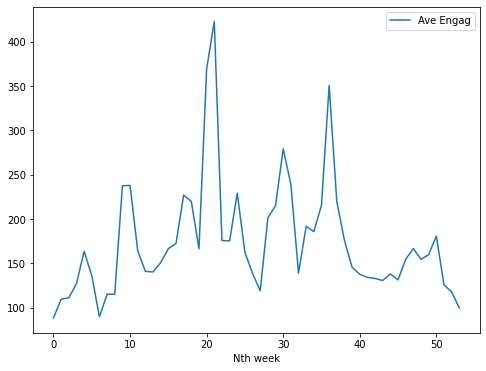

In [ ]:
# TO DISPLAY USER ENGAGEMENT STATS

import pandas as pd
df = pd.read_csv("engagement_stats.csv")
df.head()
df.plot(kind='line', x='Nth week', y='Ave Engag', figsize=(8, 6))


<AxesSubplot:xlabel='Days', ylabel='No. of users'>

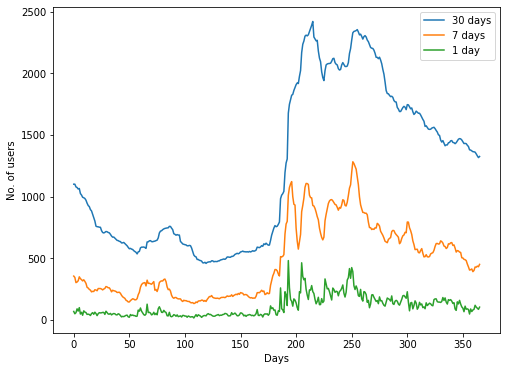

In [ ]:
# TO DISPLAY ACTIVE USER STATS

import pandas as pd
df6 = pd.read_csv("active_users.csv")
df6.head()
df6.plot(kind='line', y=['30 days', '7 days', '1 day'],
         figsize=(8, 6), ylabel='No. of users', xlabel='Days')


Text(0, 0.5, 'Nth week')

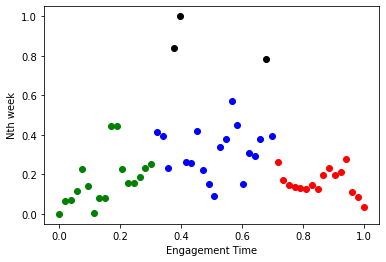

In [ ]:
# TO CLUSTER USERS BASED ON ENGAGEMENT STATS

scaler = MinMaxScaler()

df['Nth week'] = scaler.fit_transform(df[['Nth week']])


df['Ave Engag'] = scaler.fit_transform(df[['Ave Engag']])
df.head()
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Nth week', 'Ave Engag']])
    sse.append(kmeans.inertia_)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++')
y_predicted = kmeans.fit_predict(df[['Nth week', 'Ave Engag']])
df['cluster'] = y_predicted

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
plt.scatter(df1['Nth week'], df1['Ave Engag'], color='green')
plt.scatter(df2['Nth week'], df2['Ave Engag'], color='red')
plt.scatter(df3['Nth week'], df3['Ave Engag'], color='black')
plt.scatter(df4['Nth week'], df4['Ave Engag'], color='blue')
plt.xlabel('Engagement Time')
plt.ylabel('Nth week')


Text(0, 0.5, 'Days')

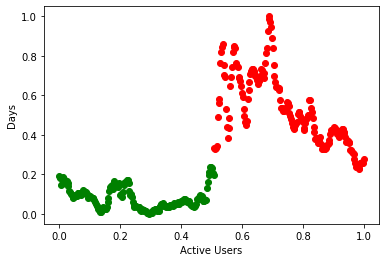

In [ ]:
# TO CLUSTER USERS BASED ON ACTIVE USER STATS

scaler = MinMaxScaler()

df6['Day'] = scaler.fit_transform(df6[['Day']])


df6['7 days'] = scaler.fit_transform(df6[['7 days']])
df6.head()

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df6[['Day', '7 days']])
    sse.append(kmeans.inertia_)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

kmeans = KMeans(n_clusters=kl.elbow, init='k-means++')
y_predicted = kmeans.fit_predict(df6[['Day', '7 days']])
df6['cluster'] = y_predicted

df1 = df6[df6.cluster == 0]
df2 = df6[df6.cluster == 1]

plt.scatter(df1['Day'], df1['7 days'], color='green')
plt.scatter(df2['Day'], df2['7 days'], color='red')

plt.xlabel('Active Users')
plt.ylabel('Days')
